 - [mnist](https://sweetornotspicymarathon.medium.com/tesorflow-keras-%E5%AD%B8%E7%BF%92%E7%AD%86%E8%A8%98-%E6%96%B0%E6%89%8B%E4%B8%80%E5%AE%9A%E8%A6%81%E7%8E%A9%E7%9A%84mnist%E6%89%8B%E5%AF%AB%E6%95%B8%E5%AD%97%E8%BE%A8%E8%AD%98-9327366cc838)
  每一張圖片為 28*28大小，這個數據庫當中包含60000筆訓練影像和10000筆測試影像
- [官方參考範例](https://github.com/ShawnHymel/computer-vision-with-embedded-machine-learning/blob/master/1.2.3%20-%20Training%20an%20Image%20Classifier%20with%20Keras/image_classifier_dnn.ipynb)


In [2]:

import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras import utils  
import numpy as np 
import pandas as pd 



In [3]:

#from keras.utils import np_utils
np.random.seed(10)

# 匯入資料

(x_train_image,y_train_label),(x_test_image,y_test_label)=mnist.load_data() # x_train_image type np.ndarray

print(x_train_image[0,0]) #每一張圖片為 28*28大小 這裡是第一個row 有28個元素
print(x_train_image[0]) #每一張圖片為 28*28大小 換個方式每一張圖片 例如 i 在x_train_image[i]
print('train data= ',len(x_train_image))
print('test data=', len(x_test_image))



[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0 

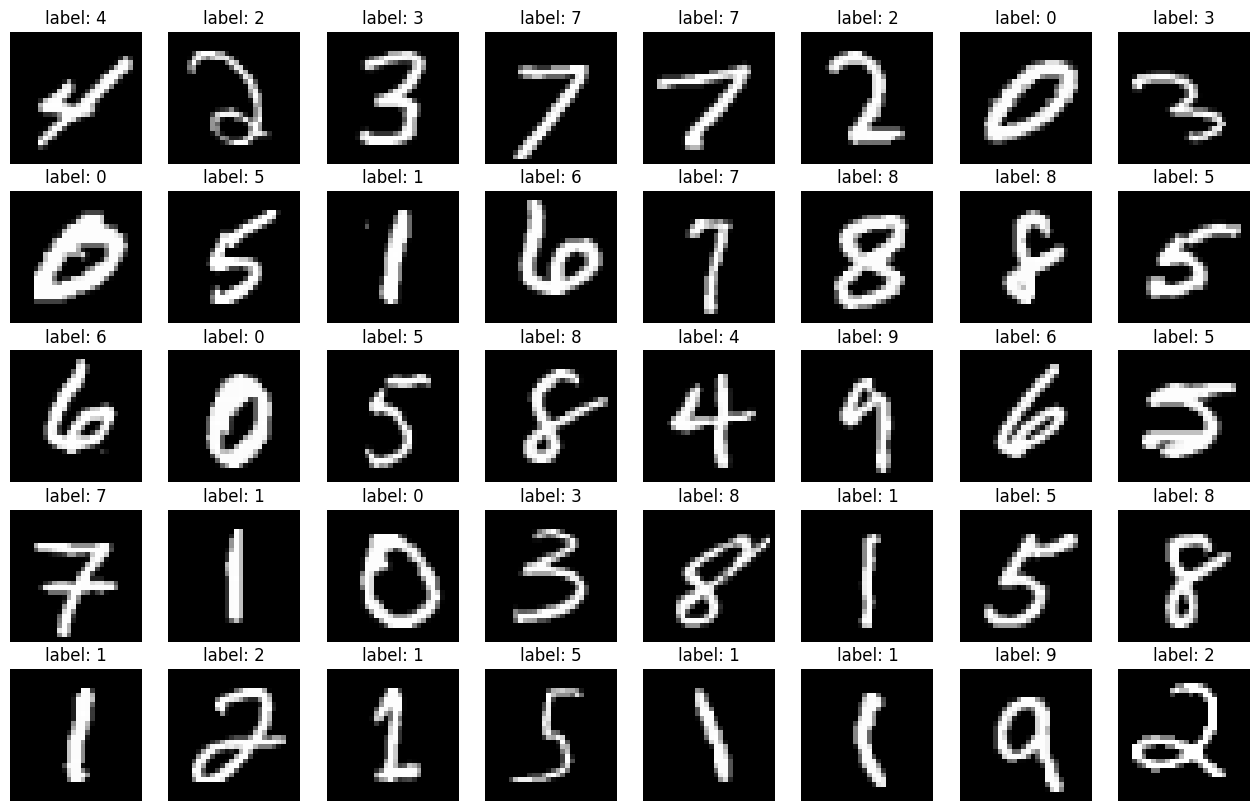

In [4]:
from random import randrange

plt.figure(figsize=(16,10),facecolor='w')
for i in range(5):
  for j in range(8):
    index = randrange(0, 60000)
    plt.subplot(5, 8, i*8+j+1) # subplot(row, column, index)
    plt.title("label: {}".format(y_train_label[index]))
    plt.imshow(x_train_image[index], plt.cm.gray)
    plt.axis('off')

plt.show()


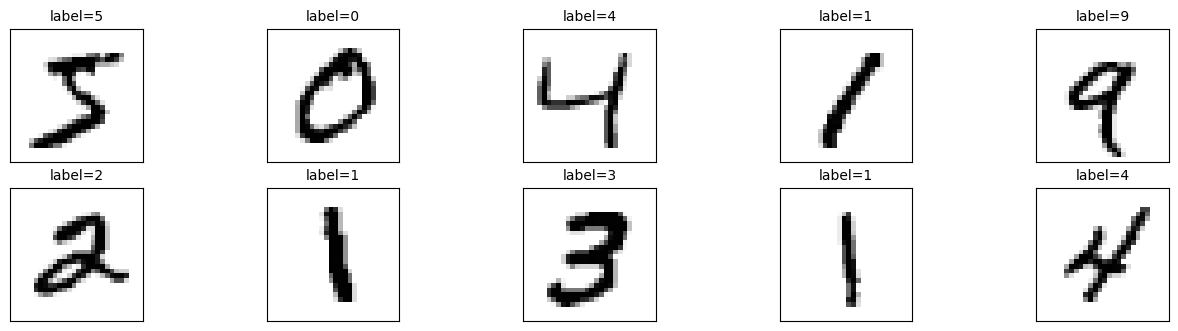

In [5]:
# 建立函數要來畫多圖的
def plot_images_labels_prediction(images,labels,prediction,idx,num=10): 
  
  # 設定顯示圖形的大小
  # fig= plt.gcf()
  # fig.set_size_inches(12,14)
  plt.figure(figsize=(16,10),facecolor='w')
  # 最多25張
  if num>25:num=25

  # 一張一張畫
  for i in range(0,num):

    # 建立子圖形5*5(五行五列)
    ax=plt.subplot(5,5,i+1)

    # 畫出子圖形
    ax.imshow(images[idx],cmap='binary')

    # 標題和label
    title="label=" +str(labels[idx])

    # 如果有傳入預測結果也顯示
    if len(prediction)>0:
      title+=",predict="+str(prediction[idx])

    # 設定子圖形的標題大小
    ax.set_title(title,fontsize=10)

    # 設定不顯示刻度
    ax.set_xticks([]);ax.set_yticks([])  
    idx+=1
  plt.show()  
  
plot_images_labels_prediction(x_train_image,y_train_label,[],0,10)



 # 2.清理資料 data cleaning



 # 查看資料的型態


In [6]:
print('x_train_image:', x_train_image.shape)
print('y_train_label:',y_train_label.shape)

x_train_image: (60000, 28, 28)
y_train_label: (60000,)


In [7]:
# 代表 train image 總共有6萬張，每一張是28*28的圖片
# label 也有6萬個
# 所以要把二維的圖片矩陣先轉換成一維
# 這裡的784是因為 28*28
x_Train=x_train_image.reshape(60000,784).astype('float32')
x_Test=x_test_image.reshape(10000,784).astype('float32')

# 轉換後的資料型態，壓扁變成一維了
print(x_Train.shape)
print(x_Test.shape)

print(x_Train[0])


(60000, 784)
(10000, 784)
[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   3.  18.
  18.  18. 126. 136. 175.  26. 166. 255. 247. 127.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.  30.  36.  94. 154. 170. 253.
 253. 253. 253. 253. 225. 172. 253. 242. 195.  64. 

 # 3.影像標準化(normailze)





In [8]:
# 由於是圖片最大的是255，所以全部除以255

x_Train_normalize=x_Train/255
x_Test_normalize=x_Test/255

print(x_Train_normalize[0])


[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

 # 4.label 前處理 使用one-hot encoding



In [12]:
# 查看原本的 label 型態
# 他是0~9的數字
y_train_label[:5]



array([5, 0, 4, 1, 9], dtype=uint8)

In [10]:
y_TrainOneHot=utils.to_categorical(y_train_label)
y_TestOneHot=utils.to_categorical(y_test_label)


In [11]:
# 來看轉換好的
# 這個就是第一筆資料，他是數字5
print(y_TrainOneHot[:1])


[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


 # 5.建立模型 多元感知器Multilayer perceptron 模型



In [12]:
from keras.models import Sequential
from keras.layers import Dense

# 建立模型
model = Sequential()

# 建立輸入層和隱藏層
model.add(Dense(units=256,input_dim=784,kernel_initializer='normal',activation='relu'))
# 定義隱藏層神經元個數256
# 輸入為28*28=784 個float 數字
# 使用 normal distribution 常態分布的亂數，初始化 weight權重 bias 偏差
# 定義激活函數為 relu


# 建立輸出層
model.add(Dense(units=10,kernel_initializer='normal',activation='softmax'))
# 定義輸出層為10個 (數字0~9)
# 也是使用常態分佈初始化
# 定義激活函數是 softmax
# 這裡建立的Dense 層，不用設定 input dim ，因為keras 會自動照上一層的256設定

print(model.summary())


c:\pywork\ollama\basic5_torch\prj\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 203,530 (795.04 KB)

 Trainable params: 203,530 (795.04 KB)

 Non-trainable params: 0 (0.00 B)

None


In [21]:
# 從這個 summary 可以看出 這一個模型是兩層的模型
# 然後隱藏層有256個神經元
# 輸出層有10個神經元

# 另外是 param 參數
# 參數的計算方式第一個是 200960=256*784+256
# 另外一個是2570=256*10+10=2570
# 下面有一個全部訓練 total params=200960+2570=203530


 # 6.開始訓練



In [22]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
# 模型訓練之前要用 compele 對模型進行設定
# loss 深度學習通常用 cross entropy 交叉嫡，訓練效果較好
# optimizer 設定訓練時依優化的方法，在深度學習使用 adam 最優化方法，最快收斂提高準確度
# metrics 設定評估模型的方式是 accuracy 準確率


In [23]:
# 開始訓練

train_history=model.fit(x=x_Train_normalize,y=y_TrainOneHot,
            validation_split=0.2,epochs=10,batch_size=200,verbose=2)
# x 是訓練資料
# y 是label 資料
# 設定參數 validation 切0.2起來驗證
# epoch=10 是訓練週期為10
# batch_size=200 每一批訓練200筆資料
# verbose =2 顯示訓練過程

# 所以以上的程式會執行10次
# 每一次執行200筆資料 ，總共訓練資料原本有60000*0.8=48000
# 48000/200=24 要跑240批次
# epoch 每一次訓練週期紀錄結果在 train_history 裡面


Epoch 1/10
240/240 - 1s - 5ms/step - accuracy: 0.9922 - loss: 0.0288 - val_accuracy: 0.9758 - val_loss: 0.0866
Epoch 2/10
240/240 - 1s - 3ms/step - accuracy: 0.9947 - loss: 0.0220 - val_accuracy: 0.9764 - val_loss: 0.0837
Epoch 3/10
240/240 - 1s - 3ms/step - accuracy: 0.9962 - loss: 0.0183 - val_accuracy: 0.9751 - val_loss: 0.0901
Epoch 4/10
240/240 - 1s - 3ms/step - accuracy: 0.9975 - loss: 0.0140 - val_accuracy: 0.9753 - val_loss: 0.0848
Epoch 5/10
240/240 - 1s - 3ms/step - accuracy: 0.9979 - loss: 0.0117 - val_accuracy: 0.9773 - val_loss: 0.0819
Epoch 6/10
240/240 - 1s - 3ms/step - accuracy: 0.9984 - loss: 0.0100 - val_accuracy: 0.9762 - val_loss: 0.0885
Epoch 7/10
240/240 - 1s - 3ms/step - accuracy: 0.9989 - loss: 0.0083 - val_accuracy: 0.9770 - val_loss: 0.0846
Epoch 8/10
240/240 - 1s - 3ms/step - accuracy: 0.9990 - loss: 0.0065 - val_accuracy: 0.9786 - val_loss: 0.0830
Epoch 9/10
240/240 - 1s - 3ms/step - accuracy: 0.9995 - loss: 0.0049 - val_accuracy: 0.9786 - val_loss: 0.0862
E

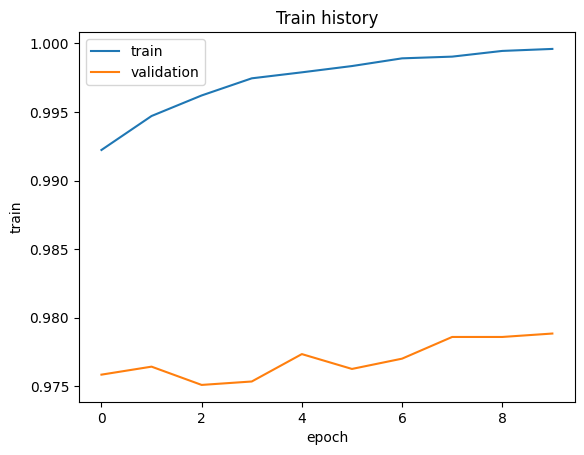

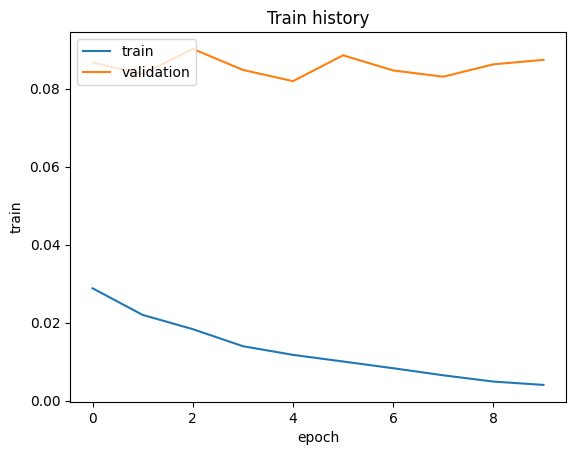

In [24]:
# 來把訓練過程畫出來

import matplotlib.pyplot as plt

def show_train_history(train_history,train,validation):

  plt.plot(train_history.history[train])
  plt.plot(train_history.history[validation])
  plt.title('Train history')
  plt.ylabel('train')
  plt.xlabel('epoch')

  # 設置圖例在左上角
  plt.legend(['train','validation'],loc='upper left')
  plt.show()

show_train_history(train_history,'accuracy','val_accuracy')
show_train_history(train_history,'loss','val_loss')


 # 7.評估測試資料準確率



In [25]:
scores=model.evaluate(x_Test_normalize,y_TestOneHot)
print()
print('accuracy',scores[1])


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 706us/step - accuracy: 0.9772 - loss: 0.0792

accuracy 0.9801999926567078


 # 8.執行預測

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 746us/step


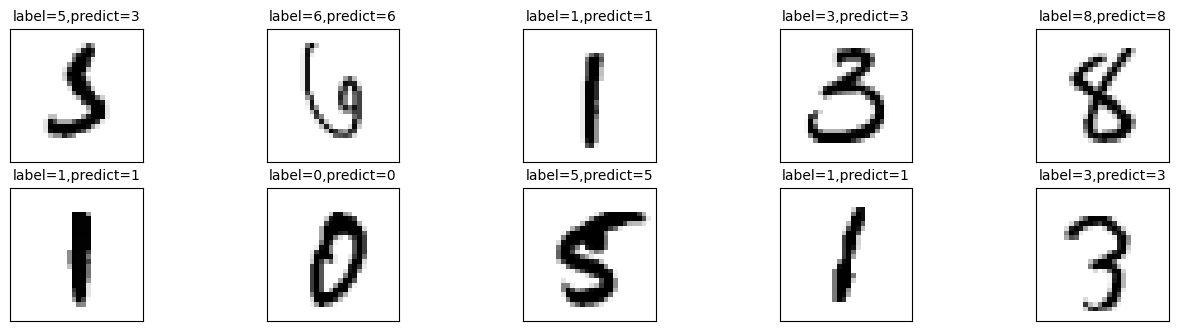

In [ ]:
#prediction=model.predict_classes(x_Test) 舊版
#prediction

predict_x=model.predict(x_Test) 
prediction=np.argmax(predict_x,axis=1)

plot_images_labels_prediction(x_test_image,y_test_label,prediction,idx=340)


 # 9.顯示混淆矩陣 confussion table

In [28]:
import pandas as pd

pd.crosstab(y_test_label,prediction,rownames=['label'],colnames=['prediction'])


prediction,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,973,1,0,2,0,0,1,1,1,1
1,0,1123,3,2,0,1,3,2,1,0
2,5,2,1006,5,1,0,3,6,4,0
3,1,0,1,996,0,3,0,3,3,3
4,2,0,1,0,960,0,5,3,1,10
5,3,0,0,10,1,868,5,1,3,1
6,5,2,0,2,3,6,940,0,0,0
7,0,5,4,2,0,0,0,1014,1,2
8,7,0,2,9,5,4,1,5,939,2


In [29]:
df = pd.DataFrame({'label':y_test_label,'predict':prediction})
df[:10]


,label,predict
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4
5,1,1
6,4,4
7,9,9
8,5,5
9,9,9


In [30]:
df[(df.label==5)&(df.predict==3)]


,label,predict
340,5,3
1003,5,3
1393,5,3
1670,5,3
2035,5,3
2597,5,3
3117,5,3
4360,5,3
5937,5,3
5972,5,3


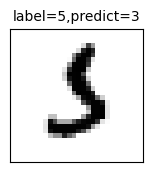

In [31]:
plot_images_labels_prediction(x_test_image,y_test_label,prediction,idx=340,num=1)


 # 10. 隱藏層增加為1000個神經元



In [32]:
model= Sequential()

model.add(Dense(units=1000,input_dim=784,kernel_initializer='normal',activation='softmax'))
model.add(Dense(units=10,kernel_initializer='normal',activation='softmax'))

print(model.summary())


c:\pywork\ollama\basic5_torch\prj\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 1000)           │       785,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │        10,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 795,010 (3.03 MB)

 Trainable params: 795,010 (3.03 MB)

 Non-trainable params: 0 (0.00 B)

None


In [33]:
# 開始訓練
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
train_history=model.fit(x=x_Train_normalize,y=y_TrainOneHot,validation_split=0.2,epochs=10,batch_size=200,verbose=2)


Epoch 1/10
240/240 - 1s - 6ms/step - accuracy: 0.7325 - loss: 2.0130 - val_accuracy: 0.8767 - val_loss: 1.6982
Epoch 2/10
240/240 - 1s - 4ms/step - accuracy: 0.8821 - loss: 1.5075 - val_accuracy: 0.9056 - val_loss: 1.3228
Epoch 3/10
240/240 - 1s - 4ms/step - accuracy: 0.9009 - loss: 1.1902 - val_accuracy: 0.9155 - val_loss: 1.0504
Epoch 4/10
240/240 - 1s - 4ms/step - accuracy: 0.9104 - loss: 0.9555 - val_accuracy: 0.9204 - val_loss: 0.8495
Epoch 5/10
240/240 - 1s - 4ms/step - accuracy: 0.9170 - loss: 0.7828 - val_accuracy: 0.9224 - val_loss: 0.7043
Epoch 6/10
240/240 - 1s - 4ms/step - accuracy: 0.9208 - loss: 0.6567 - val_accuracy: 0.9263 - val_loss: 0.5976
Epoch 7/10
240/240 - 1s - 4ms/step - accuracy: 0.9244 - loss: 0.5645 - val_accuracy: 0.9268 - val_loss: 0.5216
Epoch 8/10
240/240 - 1s - 4ms/step - accuracy: 0.9275 - loss: 0.4957 - val_accuracy: 0.9293 - val_loss: 0.4629
Epoch 9/10
240/240 - 1s - 4ms/step - accuracy: 0.9302 - loss: 0.4436 - val_accuracy: 0.9322 - val_loss: 0.4177
E

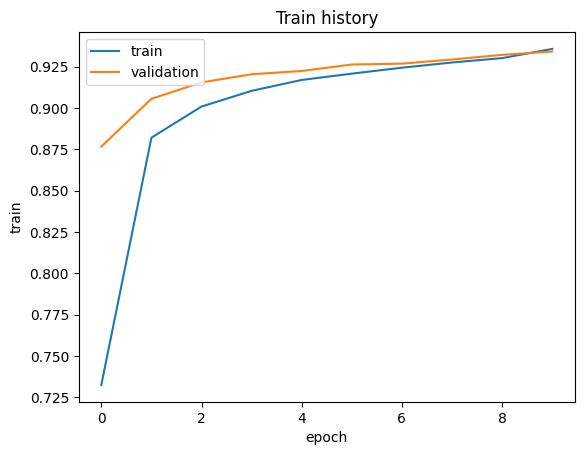

In [34]:
show_train_history(train_history,'accuracy','val_accuracy')


 # 11.加入 [dropout](https://datasciocean.tech/deep-learning-core-concept/understand-dropout-in-deep-learning/) 避免overfitting

In [35]:
from keras.models import Sequential
from keras.layers import Dense

# 主要加入這個 dropout
from keras.layers import Dropout

model = Sequential()

model.add(Dense(units=1000,input_dim=784,kernel_initializer='normal',activation='softmax'))
model.add(Dropout(0.5))
model.add(Dense(units=10,kernel_initializer='normal',activation='softmax'))
print(model.summary())

# 開始訓練
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])




Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 1000)           │       785,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1000)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │        10,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 795,010 (3.03 MB)

 Trainable params: 795,010 (3.03 MB)

 Non-trainable params: 0 (0.00 B)

None


Epoch 1/20
240/240 - 2s - 6ms/step - accuracy: 0.5241 - loss: 2.0599 - val_accuracy: 0.8286 - val_loss: 1.7648
Epoch 2/20
240/240 - 1s - 4ms/step - accuracy: 0.5084 - loss: 1.6778 - val_accuracy: 0.8663 - val_loss: 1.4318
Epoch 3/20
240/240 - 1s - 4ms/step - accuracy: 0.5134 - loss: 1.5043 - val_accuracy: 0.8842 - val_loss: 1.2241
Epoch 4/20
240/240 - 1s - 4ms/step - accuracy: 0.5381 - loss: 1.4057 - val_accuracy: 0.9028 - val_loss: 1.0772
Epoch 5/20
240/240 - 1s - 4ms/step - accuracy: 0.5661 - loss: 1.3270 - val_accuracy: 0.9107 - val_loss: 0.9598
Epoch 6/20
240/240 - 1s - 4ms/step - accuracy: 0.5715 - loss: 1.2751 - val_accuracy: 0.9163 - val_loss: 0.8645
Epoch 7/20
240/240 - 1s - 4ms/step - accuracy: 0.5880 - loss: 1.2377 - val_accuracy: 0.9223 - val_loss: 0.7886
Epoch 8/20
240/240 - 1s - 4ms/step - accuracy: 0.6014 - loss: 1.2044 - val_accuracy: 0.9214 - val_loss: 0.7507
Epoch 9/20
240/240 - 1s - 4ms/step - accuracy: 0.6140 - loss: 1.1755 - val_accuracy: 0.9208 - val_loss: 0.6952
E

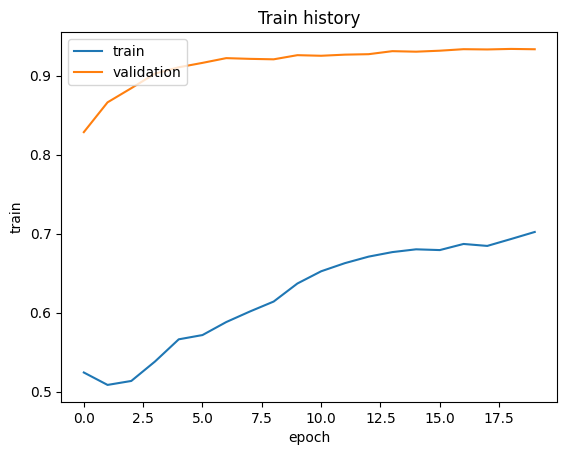

In [36]:
train_history=model.fit(x=x_Train_normalize,y=y_TrainOneHot,validation_split=0.2,epochs=20,batch_size=200,verbose=2)
show_train_history(train_history,'accuracy','val_accuracy')


In [37]:
scores=model.evaluate(x_Test_normalize,y_TestOneHot)
print()
print('accuracy',scores[1])


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 910us/step - accuracy: 0.9190 - loss: 0.4751

accuracy 0.9296000003814697


 # 12.建立多層感知模型包含2 個隱藏層

Epoch 1/20
240/240 - 2s - 10ms/step - accuracy: 0.8840 - loss: 0.3711 - val_accuracy: 0.9596 - val_loss: 0.1325
Epoch 2/20
240/240 - 2s - 7ms/step - accuracy: 0.9498 - loss: 0.1618 - val_accuracy: 0.9681 - val_loss: 0.1072
Epoch 3/20
240/240 - 2s - 7ms/step - accuracy: 0.9628 - loss: 0.1194 - val_accuracy: 0.9710 - val_loss: 0.0952
Epoch 4/20
240/240 - 2s - 7ms/step - accuracy: 0.9700 - loss: 0.0958 - val_accuracy: 0.9732 - val_loss: 0.0873
Epoch 5/20
240/240 - 2s - 7ms/step - accuracy: 0.9724 - loss: 0.0859 - val_accuracy: 0.9753 - val_loss: 0.0825
Epoch 6/20
240/240 - 2s - 7ms/step - accuracy: 0.9744 - loss: 0.0794 - val_accuracy: 0.9766 - val_loss: 0.0771
Epoch 7/20
240/240 - 2s - 7ms/step - accuracy: 0.9783 - loss: 0.0679 - val_accuracy: 0.9770 - val_loss: 0.0800
Epoch 8/20
240/240 - 2s - 7ms/step - accuracy: 0.9808 - loss: 0.0582 - val_accuracy: 0.9776 - val_loss: 0.0769
Epoch 9/20
240/240 - 2s - 7ms/step - accuracy: 0.9812 - loss: 0.0577 - val_accuracy: 0.9783 - val_loss: 0.0765


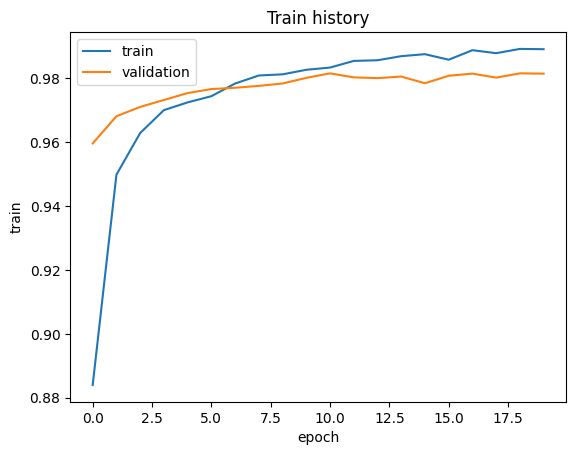

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9829 - loss: 0.0722

accuracy 0.9847999811172485


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_13 (Dense)                │ (None, 1000)           │       785,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1000)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1000)           │     1,001,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1000)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 10)             │        10,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,388,032 (20.55 MB)

 Trainable params: 1,796,010 (6.85 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,592,022 (13.70 MB)

None


In [45]:
model = Sequential()

#model(Dense(units=1000,input_dim=784,kernel_initializer='normal',activation='relu'))
model.add(Dense(units=1000,input_dim=784,kernel_initializer='normal',activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1000,kernel_initializer='normal',activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=10,kernel_initializer='normal',activation='softmax'))


# 開始訓練
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

train_history=model.fit(x=x_Train_normalize,y=y_TrainOneHot,validation_split=0.2,epochs=20,batch_size=200,verbose=2)
show_train_history(train_history,'accuracy','val_accuracy')

scores=model.evaluate(x_Test_normalize,y_TestOneHot)
print()
print('accuracy',scores[1])

print(model.summary())


 # 結論



 ## 多層感知器 Multilayer perceptron 模型，辨識手寫字

 ## 嘗試將模型加寬加深，加入 drop 以提高準確度，避免 overfitting

 ## 但多層感知器有其極限，若要提高準確度，就要使用卷積神經網路 CNN



